<h1> Regularyzacja

In [49]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`

In [50]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


In [51]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
X = boston.data
y = boston.target

Ex. 1 Split train-test dataset

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [54]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


Ex. 2 Linear regression

In [55]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
 
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
Y_pred = regr.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

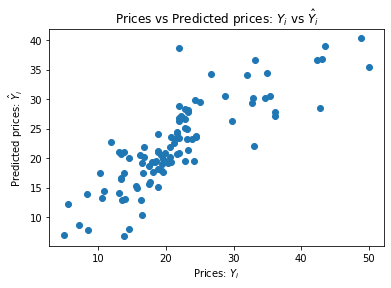

In [56]:
import matplotlib.pyplot as plt
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")


Ex. 3: To check the level of error of a model calculate the Mean Squared Error.
Ex. 4: Calculate the model.score. Check what it is for linear problems.

In [57]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, Y_pred))

23.812245465080636


In [58]:
print(regr.score(X_train, y_train))

0.7455344405641732


Using StandardScaler() and doing new linear regression

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
scaler.fit(X, y)

StandardScaler()

In [61]:
from sklearn.preprocessing import PolynomialFeatures
 
polynomial_features= PolynomialFeatures(degree=2)

In [62]:
X_new = polynomial_features.fit_transform(X,y)

In [63]:
regr2 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=15)
# Learning model on training data
regr2.fit(X_train, y_train)
# Predicting values using test data
Y_pred2 = regr2.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

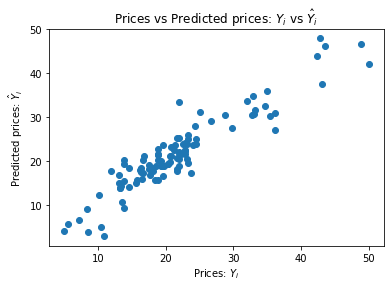

In [66]:
import matplotlib.pyplot as plt
plt.scatter(y_test, Y_pred2)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [67]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, Y_pred2))

10.41871823106127


In [69]:
print(regr2.score(X_train, y_train))

0.9325110031499098


Lasso

In [70]:
from sklearn.linear_model import Ridge, Lasso

d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e+03, tolerance: 3.472e+00
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

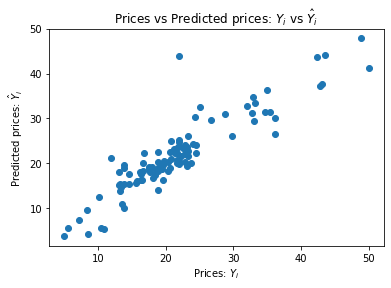

In [75]:
L1 = Lasso(0.001)
L1.fit(X_train, y_train)
# Predicting values using test data
Y_pred2 = L1.predict(X_test)
plt.scatter(y_test, Y_pred2)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [76]:
print(mean_squared_error(y_test, Y_pred2))
print(L1.score(X_train, y_train))

14.238373223533735
0.9185106843936466


Ridge


d:\Python\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.69771e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

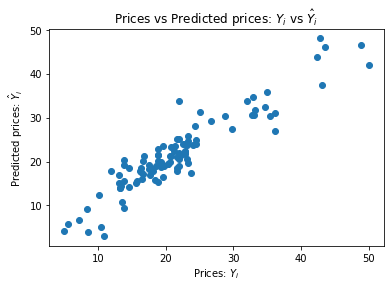

In [77]:
L2 =  Ridge(alpha=0.001)
L2.fit(X_train, y_train)
# Predicting values using test data
Y_pred2 = L2.predict(X_test)
plt.scatter(y_test, Y_pred2)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [79]:
print(mean_squared_error(y_test, Y_pred2))
print(L2.score(X_train, y_train))

10.555209931093628
0.932484623453701


breast cancer

In [82]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target

In [84]:
X_train, X_test, y_train, y_test = train_test_split(data.data, y, test_size=0.2, random_state=15)

alpha= 0.0001 | MSE= 0.0700625320181535 | score= 0.7915610938464226
alpha= 0.11120000000000001 | MSE= 0.06920283656320057 | score= 0.7734414785392865
alpha= 0.2223 | MSE= 0.0705946907429057 | score= 0.7691799855183267
alpha= 0.33340000000000003 | MSE= 0.07149366202131582 | score= 0.766404446990643
alpha= 0.4445 | MSE= 0.07214089508495537 | score= 0.7643535757139088
alpha= 0.5556 | MSE= 0.07263580204805438 | score= 0.7627432336186619
alpha= 0.6667000000000001 | MSE= 0.0730302394533683 | score= 0.7614286487354588
alpha= 0.7778 | MSE= 0.07335451722843614 | score= 0.7603250362981631
alpha= 0.8889 | MSE= 0.07362769577422991 | score= 0.7593784469653564
alpha= 1.0 | MSE= 0.07386241939543405 | score= 0.7585525183664792


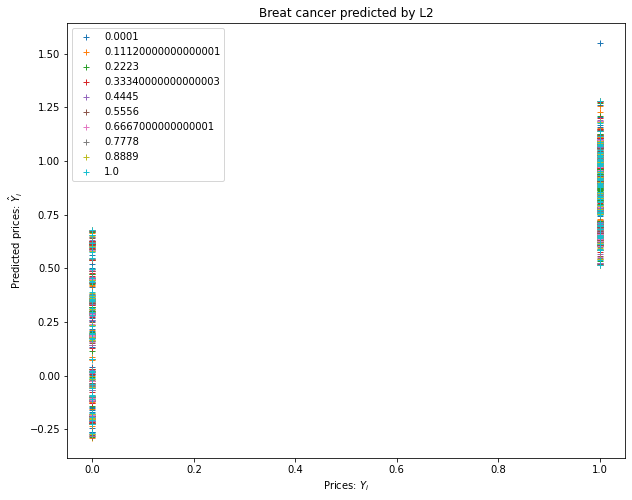

In [107]:
import numpy as np

alpha  =np.linspace(0.0001, 1, num=10)
plt.figure(1, figsize=(10, 8))
for i in alpha:
    L2 =  Ridge(alpha=i)
    L2.fit(X_train, y_train)
    # Predicting values using test data
    Y_pred2 = L2.predict(X_test)
    plt.plot(y_test, Y_pred2, '+')
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title('Breat cancer predicted by L2')
    print('alpha=',i, '| MSE=', mean_squared_error(y_test, Y_pred2),'| score=', L2.score(X_train, y_train))
plt.legend(alpha)
    